**Machine learning project**

Predicting MRSP (manufacturer's suggested retail price)
* Read the cars CSV file and explore its columns
* Select features and target
* Split data to train and validation
* Preprocess data:
1. Clean missing values in numeric features
2. Clean missing values iin categoracal features
3. Encode categorical features
* Choose model for regression problem
* Model validation: create a function to test performance of the model
* Find best leaf nodes
* Single or cross validation?
* Build final model train it on all data

In [ ]:
import pandas as pd   
import matplotlib.pyplot as plt

# Load data
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
data = pd.read_csv('cars (1).csv')

In [ ]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
#filling missing values in 'engine hp' with the mean
data["Engine HP"].fillna(data["Engine HP"].mean() , inplace=True)
data["Engine HP"].isnull().sum()

0

In [ ]:
#filling missing values in 'Engine Cylinders' with the mean
data["Engine Cylinders"].fillna(data["Engine Cylinders"].mean() , inplace=True)
data["Engine Cylinders"].isnull().sum()

0

In [ ]:
#filling missing values in 'number of doors' with the mode
data["Number of Doors"].mode()
#the mode is equal=4.0
data["Number of Doors"].fillna(4.0 , inplace=True)
data["Number of Doors"].isnull().sum()

0

In [ ]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
data["Engine Fuel Type"].mode()
#filling missing values in 'Engine Fuel Type' with the mode =='regular unleaded'
data["Engine Fuel Type"].fillna("regular unleaded" , inplace=True)
data["Engine Fuel Type"].isnull().sum()


0

In [ ]:
data["Market Category"].mode()
#filling missing values in 'Market Category' with the mode =='Crossover'
data["Market Category"].fillna("Crossover" , inplace=True)
data["Market Category"].isnull().sum()
#in this coulmn there is a high uniquness which affects negativly on our model 

0

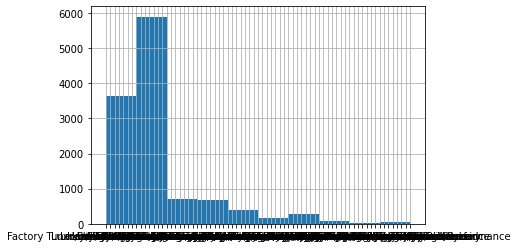

In [ ]:
data["Market Category"].hist();
#as we see in the histogram it is also right skewed which means it is better to drop it but we wont

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Make']=labelencoder.fit_transform(data['Make'])
data['Model']=labelencoder.fit_transform(data['Model'])
data['Engine Fuel Type']=labelencoder.fit_transform(data['Engine Fuel Type'])
data['Vehicle Style']=labelencoder.fit_transform(data['Vehicle Style'])
data['Market Category']=labelencoder.fit_transform(data['Market Category'])
data['Driven_Wheels']=labelencoder.fit_transform(data['Driven_Wheels'])
data['Transmission Type']=labelencoder.fit_transform(data['Transmission Type'])
data['Vehicle Size']=labelencoder.fit_transform(data['Vehicle Size'])



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  int64  
 1   Model              11914 non-null  int64  
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  int64  
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  int64  
 7   Driven_Wheels      11914 non-null  int64  
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  int64  
 10  Vehicle Size       11914 non-null  int64  
 11  Vehicle Style      11914 non-null  int64  
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(1

In [ ]:
features=data.drop(columns=["MSRP"])
target=data["MSRP"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators = 500, random_state = 0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("Single validation:")
print("\nRMSE:\n",rmse)
print("\nR2:\n",r2)

Single validation:

RMSE:
 9364.31

R2:
 0.960087573661113


In [ ]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(model, features, target, cv=5,scoring='neg_mean_squared_error')
print("scores")
print("Cross validation:")
print(np.sqrt(scores).mean())
print("single validation is better")

scores
Cross validation:
46232.40505864089
single validation is better


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
best_leaf=0
min_mae=500000
for max_leaf_nodes in range(300,500):
    my_mae = get_mae(max_leaf_nodes,X_train,X_test,y_train,y_test)
    if my_mae<min_mae:
      best_leaf=max_leaf_nodes
      min_mae=my_mae
print(f'best leaf={best_leaf} , min mae= {min_mae}')

best leaf=492 , min mae= 3904.203298806368


In [ ]:
feat=[i for i in features.columns]
imp=pd.Series(model.feature_importances_,index=feat).sort_values()
imp

Driven_Wheels        0.001884
Transmission Type    0.003133
Engine Fuel Type     0.003551
Number of Doors      0.004193
Vehicle Size         0.006067
Market Category      0.018282
Make                 0.018851
Vehicle Style        0.021276
highway MPG          0.025756
city mpg             0.031074
Model                0.034852
Year                 0.036492
Popularity           0.046765
Engine HP            0.345508
Engine Cylinders     0.402314
dtype: float64

In [ ]:
model_0=RandomForestRegressor(n_estimators = 500, random_state = 0)
model_0.fit(features,target)

RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
def acc(Model):
  Model=RandomForestRegressor(n_estimators = 500, random_state = 0)
  Model.fit(X_train,y_train)
  y_pred = Model.predict(X_test)
  from sklearn.metrics import mean_squared_error
  import numpy as np
  rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
  from sklearn.metrics import r2_score
  r2=r2_score(y_test,y_pred)
  val={
      "R2":r2,
       "RMSE":rmse
  }
  
  return val
  




In [ ]:
acc(model)

{'R2': 0.960087573661113, 'RMSE': 9364.31}